In [1]:
from pathlib import Path

# import numpy as np
import pandas as pd

# from rdkit import Chem
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
result_dir = Path("./results_ipab/")
# sdf_files = sorted(list(result_dir.glob("./*align_corrected.sdf")))

result_dir_fda = Path("./results_fda/")
# sdf_files_fda = sorted(list(result_dir_fda.glob("./*align_corrected.sdf")))

In [3]:
df_docked_ipab = pd.read_csv("../autodock_vina/results_ipab/docked.csv")
df_docked_fda = pd.read_csv("../autodock_vina/results_fda/docked.csv")

In [4]:
df_karmascore_ipab = pd.read_csv(result_dir / "score.csv").rename(columns={'pdb_id': 'Znumber'})
df_karmascore_fda = pd.read_csv(result_dir_fda / "score.csv").rename(columns={'pdb_id': 'Znumber'})

In [5]:
df_merged_ipab = df_docked_ipab.merge(df_karmascore_ipab, on='Znumber')
df_merged_fda = df_docked_fda.merge(df_karmascore_fda, on='Znumber')

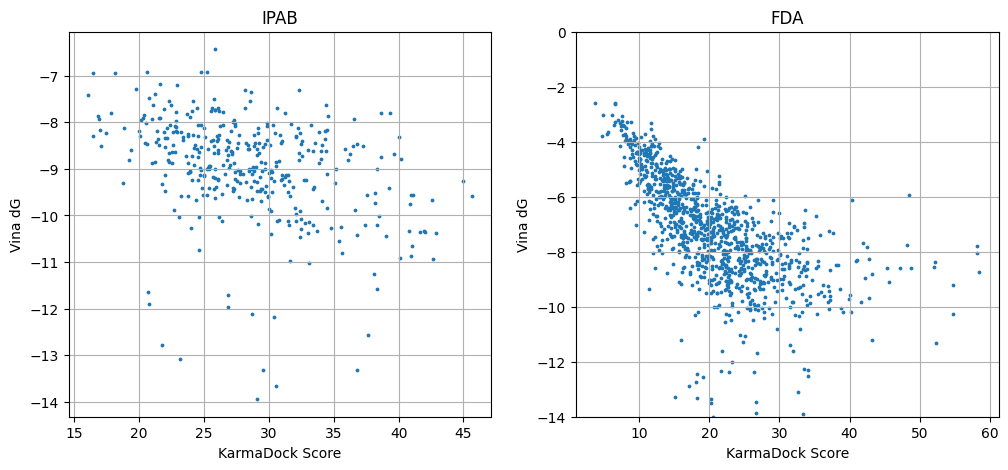

In [6]:
markersize: float = 3.0
show_x_col = "karma_score_aligned"
show_y_col = "score"
xlabel_name = 'KarmaDock Score'
ylable_name = 'Vina dG'

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_merged_ipab[show_x_col].values, df_merged_ipab[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.title(f"IPAB")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df_merged_fda[show_x_col].values, df_merged_fda[show_y_col].values, marker='o', s=markersize)
plt.xlabel(xlabel_name)
plt.ylabel(ylable_name)
plt.ylim(-14, 0)
plt.title(f"FDA")

plt.grid()
plt.savefig("karmadock-01.png")
plt.show()


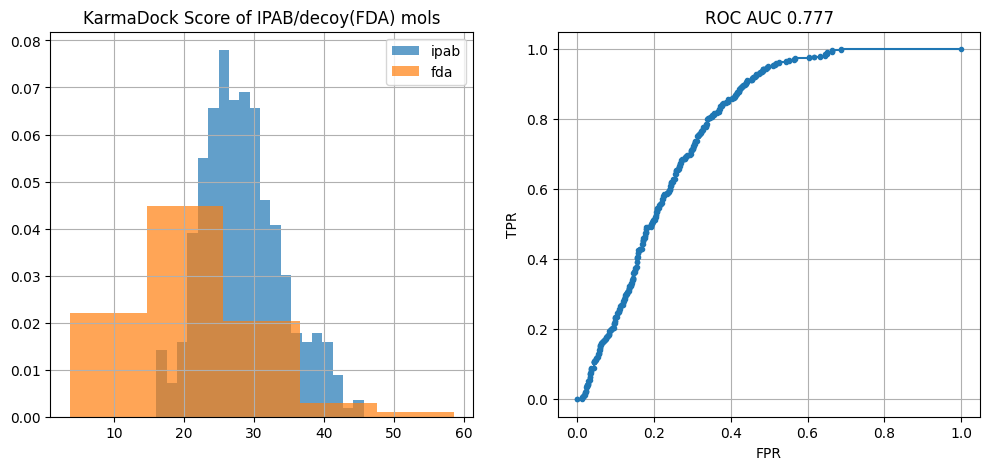

In [7]:
df_merged_ipab["label"] = 1
df_merged_fda["label"] = 0
df_merged = pd.concat([df_merged_ipab, df_merged_fda], axis=0)
true_label = df_merged.label.values == 1
score_col = "karma_score_aligned"
pred = df_merged[score_col].values

plt.figure(figsize=(12, 5))
markersize: float = 3.0
plt.subplot(1, 2, 1)
plt.hist(df_merged_ipab[score_col].values, bins=20, label='ipab', density=True, alpha=0.7)
plt.hist(df_merged_fda[score_col].values, bins=5, label='fda', density=True, alpha=0.7)
# plt.xlim(0, 5)
plt.grid()
plt.legend()
plt.title("KarmaDock Score of IPAB/decoy(FDA) mols")

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(true_label, pred)
roc_auc = roc_auc_score(true_label, pred)
plt.plot(fpr, tpr, marker='o', markersize=markersize)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f"ROC AUC {roc_auc:.3f}")
plt.grid()

plt.savefig("karmadock-02.png")

plt.show()